# *Binary Classification with a Bank Churn Dataset*

![](https://www.kaggle.com/competitions/65711/images/header)

# *🔍 Customer Churn Prediction*

This notebook presents an end-to-end machine learning pipeline for **customer churn prediction**.

## *📌 Workflow*
- Exploratory Data Analysis (EDA)
- Feature Engineering
- Model Benchmarking
- Cross Validation
- Hyperparameter Tuning
- Feature Importance Analysis
- Final Model Training & Saving

## *🎯 Objective*
Predict whether a customer will churn (`Exited = 1`) using demographic, financial, and behavioral features.

## *🧠 Evaluation Metric*
The primary evaluation metric is **ROC-AUC**, which is robust for imbalanced classification problems.

## *📊 Models Used*
- Logistic Regression  
- Decision Tree  
- Random Forest  
- Gradient Boosting  
- AdaBoost  
- **LightGBM**
- **XGBoost**
- **CatBoost**

---


## *Import*

In [2]:
import pandas as pd
# pandas: veri işleme ve analiz kütüphanesi

from tensorflow.keras.models import Sequential
# Sequential: katmanları sırayla ekleyerek model kurmamızı sağlar

from tensorflow.keras.layers import Dense
# Dense: tam bağlantılı (fully connected) yapay sinir ağı katmanı

from sklearn.preprocessing import StandardScaler
# Verileri ölçeklemek (standartlaştırmak) için kullanılan sınıf

import warnings
warnings.filterwarnings('ignore')

# warnings kütüphanesi, çalışma sırasında çıkan uyarı mesajlarını kontrol eder.
# Bu satır uyarı mesajlarını gizleyerek çıktının temiz görünmesini sağlar.

import matplotlib.pyplot as plt
import seaborn as sns 

# matplotlib.pyplot ve seaborn kütüphaneleri veri görselleştirme için kullanılır.
# plt temel grafik çizimlerinde, sns ise daha gelişmiş ve estetik grafiklerde tercih edilir.

## *Read Data*

In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/playground-series-s4e1/sample_submission.csv
/kaggle/input/playground-series-s4e1/train.csv
/kaggle/input/playground-series-s4e1/test.csv


In [4]:
df = pd.read_csv('/kaggle/input/playground-series-s4e1/train.csv')

# '/kaggle/input/playground-series-s4e1/train.csv' adlı CSV dosyasını okur ve veriyi bir pandas DataFrame'i olarak 'df' değişkenine yükler.

## *Exploratory Data Analysis*

In [5]:
df.head()
# Veri setinin ilk 5 satırını görüntüler.
# Bu, veri yapısını ve sütunları genel olarak incelemek için kullanılır.

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [6]:
df.sample()
# Veri setinden rastgele bir satır (veya satırlar) getirir.
# Veri kontrolü ve genel görünüm hakkında fikir edinmek için yararlıdır.

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
126201,126201,15711249,Chiang,619,Germany,Male,34.0,9,132403.56,1,1.0,0.0,107874.39,0


In [7]:
df.isnull().sum()
# Her sütunda kaç adet eksik (NaN) değer bulunduğunu gösterir.
# Eksik veri analizi yapmak için kullanılır.

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
df.shape
# Veri setinin boyutlarını (satır, sütun) bir demet (tuple) olarak döndürür.
# Örneğin (1470, 35) gibi bir çıktı verir.

(165034, 14)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [10]:
df.columns
# DataFrame’deki sütun isimlerini listeler

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

## *Data Visualization*

In [11]:
sns.set_theme(style="whitegrid")

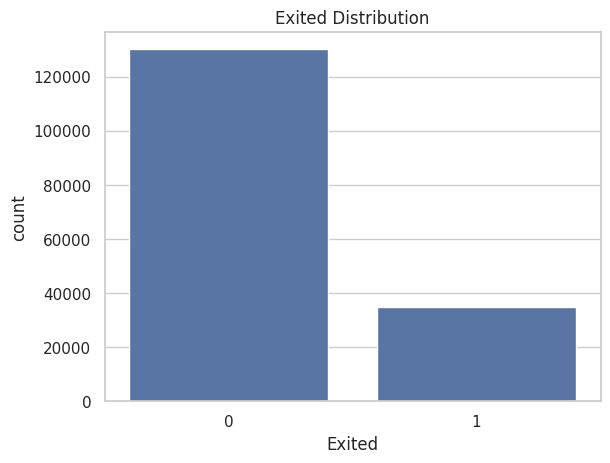

In [12]:
sns.countplot(data=df, x="Exited")
plt.title("Exited Distribution")
plt.show()

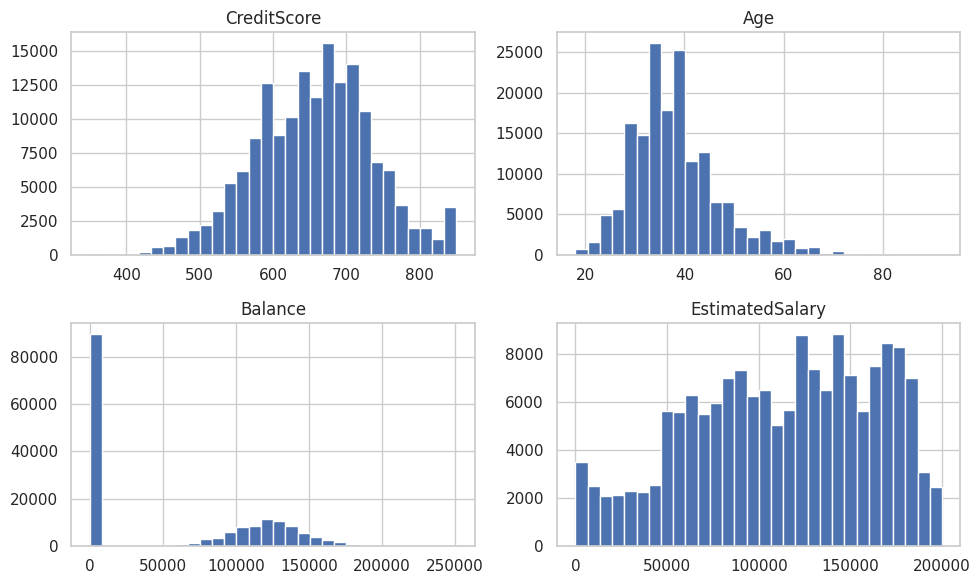

In [13]:
num_cols = ["CreditScore", "Age", "Balance", "EstimatedSalary"]

df[num_cols].hist(bins=30, figsize=(10,6))
plt.tight_layout()
plt.show()

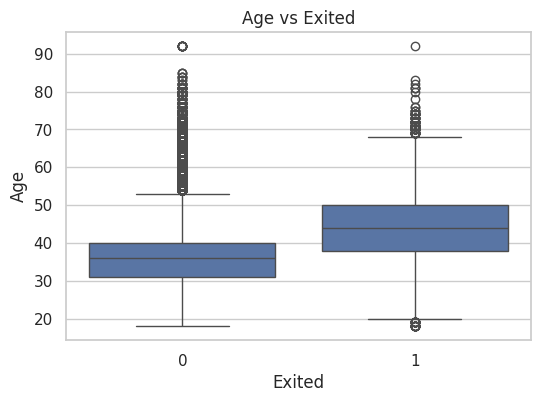

In [14]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="Exited", y="Age")
plt.title("Age vs Exited")
plt.show()

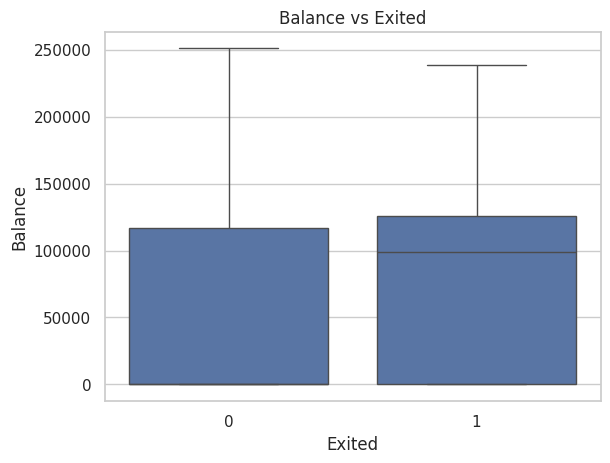

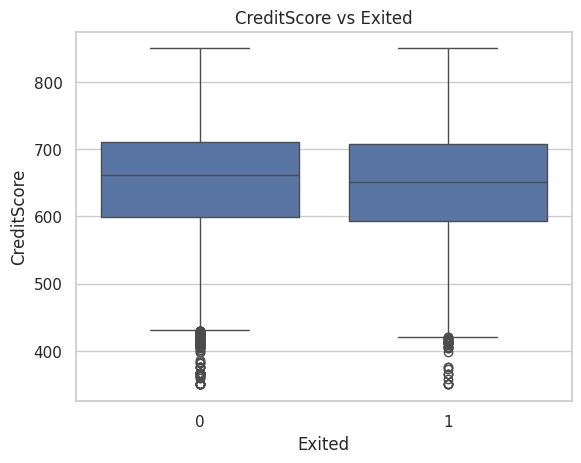

In [15]:
for col in ["Balance", "CreditScore"]:
    sns.boxplot(data=df, x="Exited", y=col)
    plt.title(f"{col} vs Exited")
    plt.show()

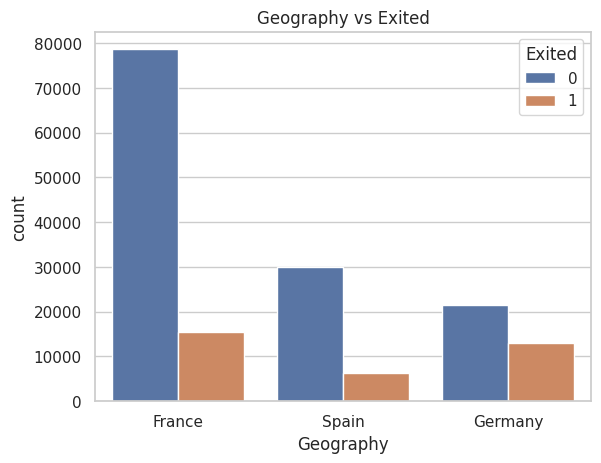

In [16]:
sns.countplot(data=df, x="Geography", hue="Exited")
plt.title("Geography vs Exited")
plt.show()

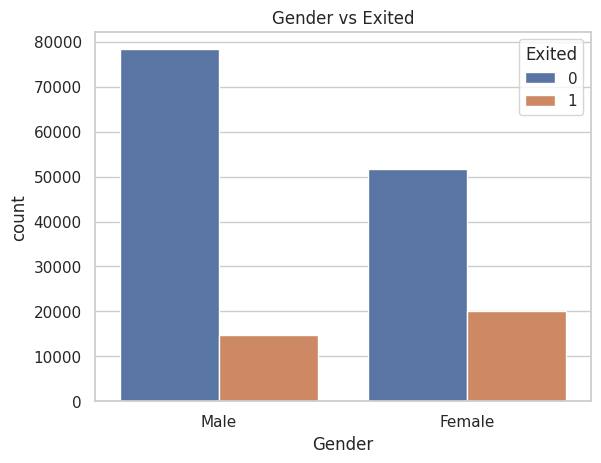

In [17]:
sns.countplot(data=df, x="Gender", hue="Exited")
plt.title("Gender vs Exited")
plt.show()

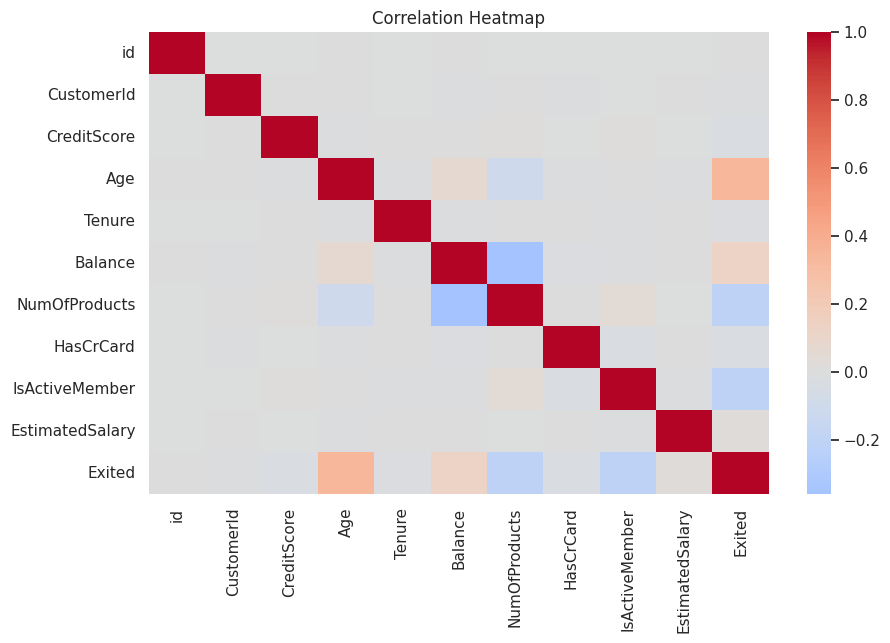

In [18]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

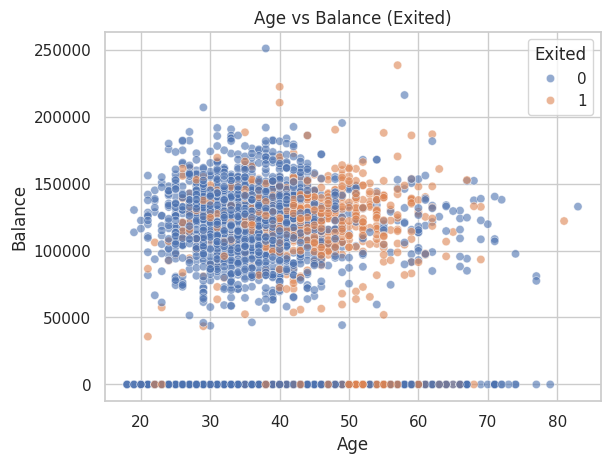

In [19]:
sns.scatterplot(
    data=df.sample(5000),
    x="Age",
    y="Balance",
    hue="Exited",
    alpha=0.6
)
plt.title("Age vs Balance (Exited)")
plt.show()

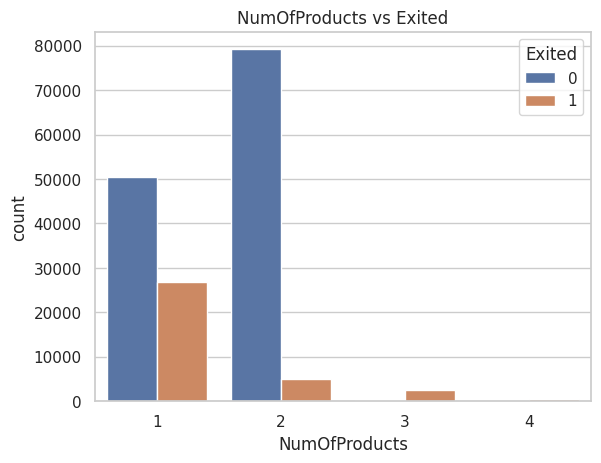

In [20]:
sns.countplot(data=df, x="NumOfProducts", hue="Exited")
plt.title("NumOfProducts vs Exited")
plt.show()

## *Feature Engineering*

In [21]:
df = pd.get_dummies(df, columns=["Geography", "Gender"], drop_first=True)

In [22]:
df["HasBalance"] = (df["Balance"] > 0).astype(int)

In [23]:
df["BalancePerProduct"] = df["Balance"] / (df["NumOfProducts"] + 1)

In [24]:
df["AgeGroup"] = pd.cut(
    df["Age"],
    bins=[0,30,40,50,60,100],
    labels=[0,1,2,3,4]
)
df["AgeGroup"] = df["AgeGroup"].astype(int)

In [25]:
df["ActiveProductScore"] = df["IsActiveMember"] * df["NumOfProducts"]

In [26]:
df["CreditScoreGroup"] = pd.cut(
    df["CreditScore"],
    bins=[0,580,670,740,850],
    labels=[0,1,2,3]
).astype(int)

In [27]:
df["TenureRatio"] = df["Tenure"] / df["Age"]
df["SalaryToBalance"] = df["EstimatedSalary"] / (df["Balance"] + 1)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  165034 non-null  int64  
 1   CustomerId          165034 non-null  int64  
 2   Surname             165034 non-null  object 
 3   CreditScore         165034 non-null  int64  
 4   Age                 165034 non-null  float64
 5   Tenure              165034 non-null  int64  
 6   Balance             165034 non-null  float64
 7   NumOfProducts       165034 non-null  int64  
 8   HasCrCard           165034 non-null  float64
 9   IsActiveMember      165034 non-null  float64
 10  EstimatedSalary     165034 non-null  float64
 11  Exited              165034 non-null  int64  
 12  Geography_Germany   165034 non-null  bool   
 13  Geography_Spain     165034 non-null  bool   
 14  Gender_Male         165034 non-null  bool   
 15  HasBalance          165034 non-nul

In [29]:
drop_cols = ["id", "CustomerId", "Surname"]
df = df.drop(columns=drop_cols)

In [31]:
import numpy as np

df.replace([np.inf, -np.inf], 0, inplace=True)
df.fillna(0, inplace=True)

In [32]:
bool_cols = df.select_dtypes("bool").columns
df[bool_cols] = df[bool_cols].astype(int)

## *Target – Feature*

In [33]:
x = df.drop("Exited", axis=1)
y = df["Exited"]

## *Train / Test Distinction*

In [34]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.20,      # Verinin %20’si test için ayrılır
    random_state=42,     # Tekrar çalıştırıldığında aynı bölünmeyi sağlar (sabitlik)
    stratify=y           # sınıf dağılımını korur
)
# train_test_split: veriyi eğitim ve test seti olarak ikiye ayırır

## *Model*

In [35]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report
)

from sklearn.model_selection import train_test_split

import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostClassifier


# -----------------------------
# MODELLER
# -----------------------------
l  = LogisticRegression(max_iter=1000, n_jobs=-1)
d  = DecisionTreeClassifier(random_state=42)
r  = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
gb = GradientBoostingClassifier(random_state=42)
ab = AdaBoostClassifier(random_state=42)

lgbm = lgb.LGBMClassifier(
    n_estimators=300,
    learning_rate=0.05,
    random_state=42,
    n_jobs=-1
)

xgbm = xgb.XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="logloss",
    random_state=42,
    n_jobs=-1
)

cat = CatBoostClassifier(
    iterations=300,
    learning_rate=0.05,
    depth=6,
    random_state=42,
    verbose=False
)


def algo_test(x, y):
    modeller = [
        l, d, r, gb, ab,
        lgbm, xgbm, cat
    ]

    isimler = [
        "LogisticRegression",
        "DecisionTreeClassifier",
        "RandomForestClassifier",
        "GradientBoostingClassifier",
        "AdaBoostClassifier",
        "LightGBM",
        "XGBoost",
        "CatBoost"
    ]

    x_train, x_test, y_train, y_test = train_test_split(
        x, y,
        test_size=0.20,
        random_state=42,
        stratify=y
    )

    accuracy, precision, recall, f1, roc_auc, mdl = [], [], [], [], [], []

    print("Veriler hazır, modeller deneniyor...\n")

    for model in modeller:
        print(f"{model.__class__.__name__} modeli eğitiliyor...")
        model.fit(x_train, y_train)

        y_pred = model.predict(x_test)
        y_proba = model.predict_proba(x_test)[:, 1]

        mdl.append(model)
        accuracy.append(accuracy_score(y_test, y_pred))
        precision.append(precision_score(y_test, y_pred))
        recall.append(recall_score(y_test, y_pred))
        f1.append(f1_score(y_test, y_pred))
        roc_auc.append(roc_auc_score(y_test, y_proba))

        print("Confusion Matrix:")
        print(confusion_matrix(y_test, y_pred))
        print("-" * 50)

    print("Eğitim tamamlandı.\n")

    metrics = pd.DataFrame({
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1": f1,
        "ROC_AUC": roc_auc
    }, index=isimler)

    metrics.sort_values("ROC_AUC", ascending=False, inplace=True)

    print("🏆 En başarılı model:", metrics.index[0])

    best_model = mdl[metrics.index.get_loc(metrics.index[0])]
    y_pred_best = best_model.predict(x_test)

    print("\nBest Model Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred_best))

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_best))

    return metrics

In [36]:
algo_test(x,y)

Veriler hazır, modeller deneniyor...

LogisticRegression modeli eğitiliyor...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix:
[[24830  1193]
 [ 4436  2548]]
--------------------------------------------------
DecisionTreeClassifier modeli eğitiliyor...
Confusion Matrix:
[[22592  3431]
 [ 3199  3785]]
--------------------------------------------------
RandomForestClassifier modeli eğitiliyor...
Confusion Matrix:
[[24595  1428]
 [ 3240  3744]]
--------------------------------------------------
GradientBoostingClassifier modeli eğitiliyor...
Confusion Matrix:
[[24791  1232]
 [ 3242  3742]]
--------------------------------------------------
AdaBoostClassifier modeli eğitiliyor...
Confusion Matrix:
[[24734  1289]
 [ 3359  3625]]
--------------------------------------------------
LGBMClassifier modeli eğitiliyor...
[LightGBM] [Info] Number of positive: 27937, number of negative: 104090
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005420 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wi

,Accuracy,Precision,Recall,F1,ROC_AUC
CatBoost,0.866028,0.755281,0.542669,0.631561,0.889770
LightGBM,0.866180,0.747350,0.555269,0.637148,0.889591
XGBoost,0.865483,0.745750,0.552692,0.634868,0.889259
GradientBoostingClassifier,0.864453,0.752312,0.535796,0.625857,0.888120
AdaBoostClassifier,0.859181,0.737688,0.519044,0.609346,0.876705
RandomForestClassifier,0.858575,0.723898,0.536082,0.615992,0.874961
LogisticRegression,0.829460,0.681101,0.364834,0.475152,0.818007
DecisionTreeClassifier,0.799134,0.524529,0.541953,0.533099,0.705250


## *Cross Validation*

In [37]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

cv = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

lgbm_cv = lgb.LGBMClassifier(
    n_estimators=300,
    learning_rate=0.05,
    random_state=42,
    n_jobs=-1
)

cv_scores = cross_val_score(
    lgbm_cv,
    x,
    y,
    scoring="roc_auc",
    cv=cv,
    n_jobs=-1
)

print("CV ROC-AUC Scores:", cv_scores)
print("Mean CV ROC-AUC:", cv_scores.mean())

CV ROC-AUC Scores: [0.88920272 0.88877915 0.89073244 0.89108296 0.88692665]
Mean CV ROC-AUC: 0.8893447839035453


## *Hyperparameter Tuning*

In [38]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    "n_estimators": [300, 500, 700],
    "learning_rate": [0.01, 0.03, 0.05],
    "num_leaves": [31, 63, 127],
    "max_depth": [-1, 6, 10],
    "subsample": [0.7, 0.8, 0.9],
    "colsample_bytree": [0.7, 0.8, 0.9]
}

lgbm = lgb.LGBMClassifier(
    random_state=42,
    n_jobs=-1
)

rs = RandomizedSearchCV(
    lgbm,
    param_distributions=param_dist,
    n_iter=8,
    scoring="roc_auc",
    cv=2,
    verbose=1,
    random_state=42,
    n_jobs=-1 
)

rs.fit(x_train, y_train)

print("Best ROC-AUC:", rs.best_score_)
print("Best Params:", rs.best_params_)

Fitting 2 folds for each of 8 candidates, totalling 16 fits
[LightGBM] [Info] Number of positive: 27937, number of negative: 104090
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.131089 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1635
[LightGBM] [Info] Number of data points in the train set: 132027, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.211601 -> initscore=-1.315304
[LightGBM] [Info] Start training from score -1.315304
[LightGBM] [Info] Number of positive: 13968, number of negative: 52045
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.098369 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1628
[LightGBM] [Info] Number of data points in the train set: 66013, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.211595 -> initscore=-1.315340
[Lig

## *Feature Importance*

In [39]:
best_lgbm = rs.best_estimator_

importances = best_lgbm.feature_importances_
feature_imp = (
    pd.Series(importances, index=x.columns)
    .sort_values(ascending=False)
)

feature_imp.head(15)

Age                   3305
CreditScore           2322
SalaryToBalance       2075
Balance               1645
NumOfProducts         1621
EstimatedSalary       1547
BalancePerProduct     1466
TenureRatio           1333
Gender_Male           1287
Geography_Germany     1063
IsActiveMember        1006
ActiveProductScore     764
HasCrCard              513
AgeGroup               406
Tenure                 392
dtype: int32

## *Final Model*

In [40]:
final_model = best_lgbm

final_model.fit(x, y)

[LightGBM] [Info] Number of positive: 34921, number of negative: 130113
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004403 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1636
[LightGBM] [Info] Number of data points in the train set: 165034, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.211599 -> initscore=-1.315315
[LightGBM] [Info] Start training from score -1.315315


LGBMClassifier(colsample_bytree=0.7, learning_rate=0.01, max_depth=10,
               n_estimators=700, n_jobs=-1, random_state=42, subsample=0.7)

## *Save Model*

In [41]:
import joblib
joblib.dump(final_model, "final_model.pkl")

['final_model.pkl']

## *Save Features*

In [42]:
joblib.dump(list(x.columns), "model_features.pkl")

['model_features.pkl']

## *Quick Test (Download & Predict)*

In [43]:
loaded_model = joblib.load("final_model.pkl")
features = joblib.load("model_features.pkl")

In [44]:
# örnek 1 satırlık veri (DataFrame olmalı!)
sample = x.iloc[[0]]

pred_proba = loaded_model.predict_proba(sample)[:, 1]
pred_class = (pred_proba >= 0.5).astype(int)

pred_proba, pred_class

(array([0.01649342]), array([0]))

# *✅ Final Results & Conclusion*

## *🏆 Best Performing Models (ROC-AUC)*
- **CatBoost** : 0.8898  
- **LightGBM** : 0.8896  
- **XGBoost**  : 0.8893  

All three gradient-boosting-based models show very similar and strong performance.

## *📌 Key Insights*
- Churn is strongly related to **age**, **balance usage**, and **customer activity**
- Engineered features such as *BalancePerProduct* and *ActiveProductScore* improved performance
- Cross-validation scores were stable, indicating good generalization

## *🚀 Final Model*
The final model was trained using the best hyperparameters and saved for inference.

```python
joblib.dump(final_model, "final_model.pkl")
joblib.dump(feature_list, "model_features.pkl")
